 # **Import the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import joblib 

# **Data Collection & Preprocessing Data**

In [4]:
# read csv file
df = pd.read_csv(r"C:\Users\original\Downloads\insurance.csv")

In [5]:
# Display Top 5 Rows of The Dataset
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Check Last 5 Rows of The Dataset
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# Find Shape of Our Dataset (Number of Rows And Number of Columns)
df.shape

(1338, 7)

In [8]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1338
Number of Columns 7


In [9]:
# Get Information About Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Check Null Values In The Dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Summary statistics for the numerical columns in data, # Get Overall Statistics About The Dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Encoding 

In [15]:
le_dict = {
    'sex': LabelEncoder(),
    'smoker': LabelEncoder(),
    'region': LabelEncoder()
}
columns_to_encode = ['sex', 'smoker', 'region']
for column in columns_to_encode:
    df[column] = le_dict[column].fit_transform(df[column])

joblib.dump(le_dict, r"C:\Users\original\Downloads\label_encoders.pkl")

['C:\\Users\\original\\Downloads\\label_encoders.pkl']

In [16]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# **Visual Analysis of Distributions and Relationships**

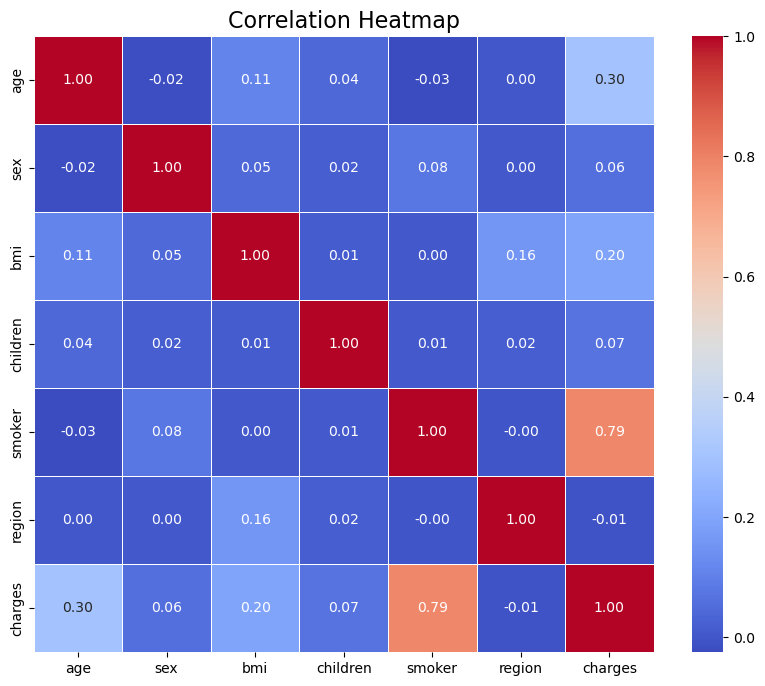

In [18]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

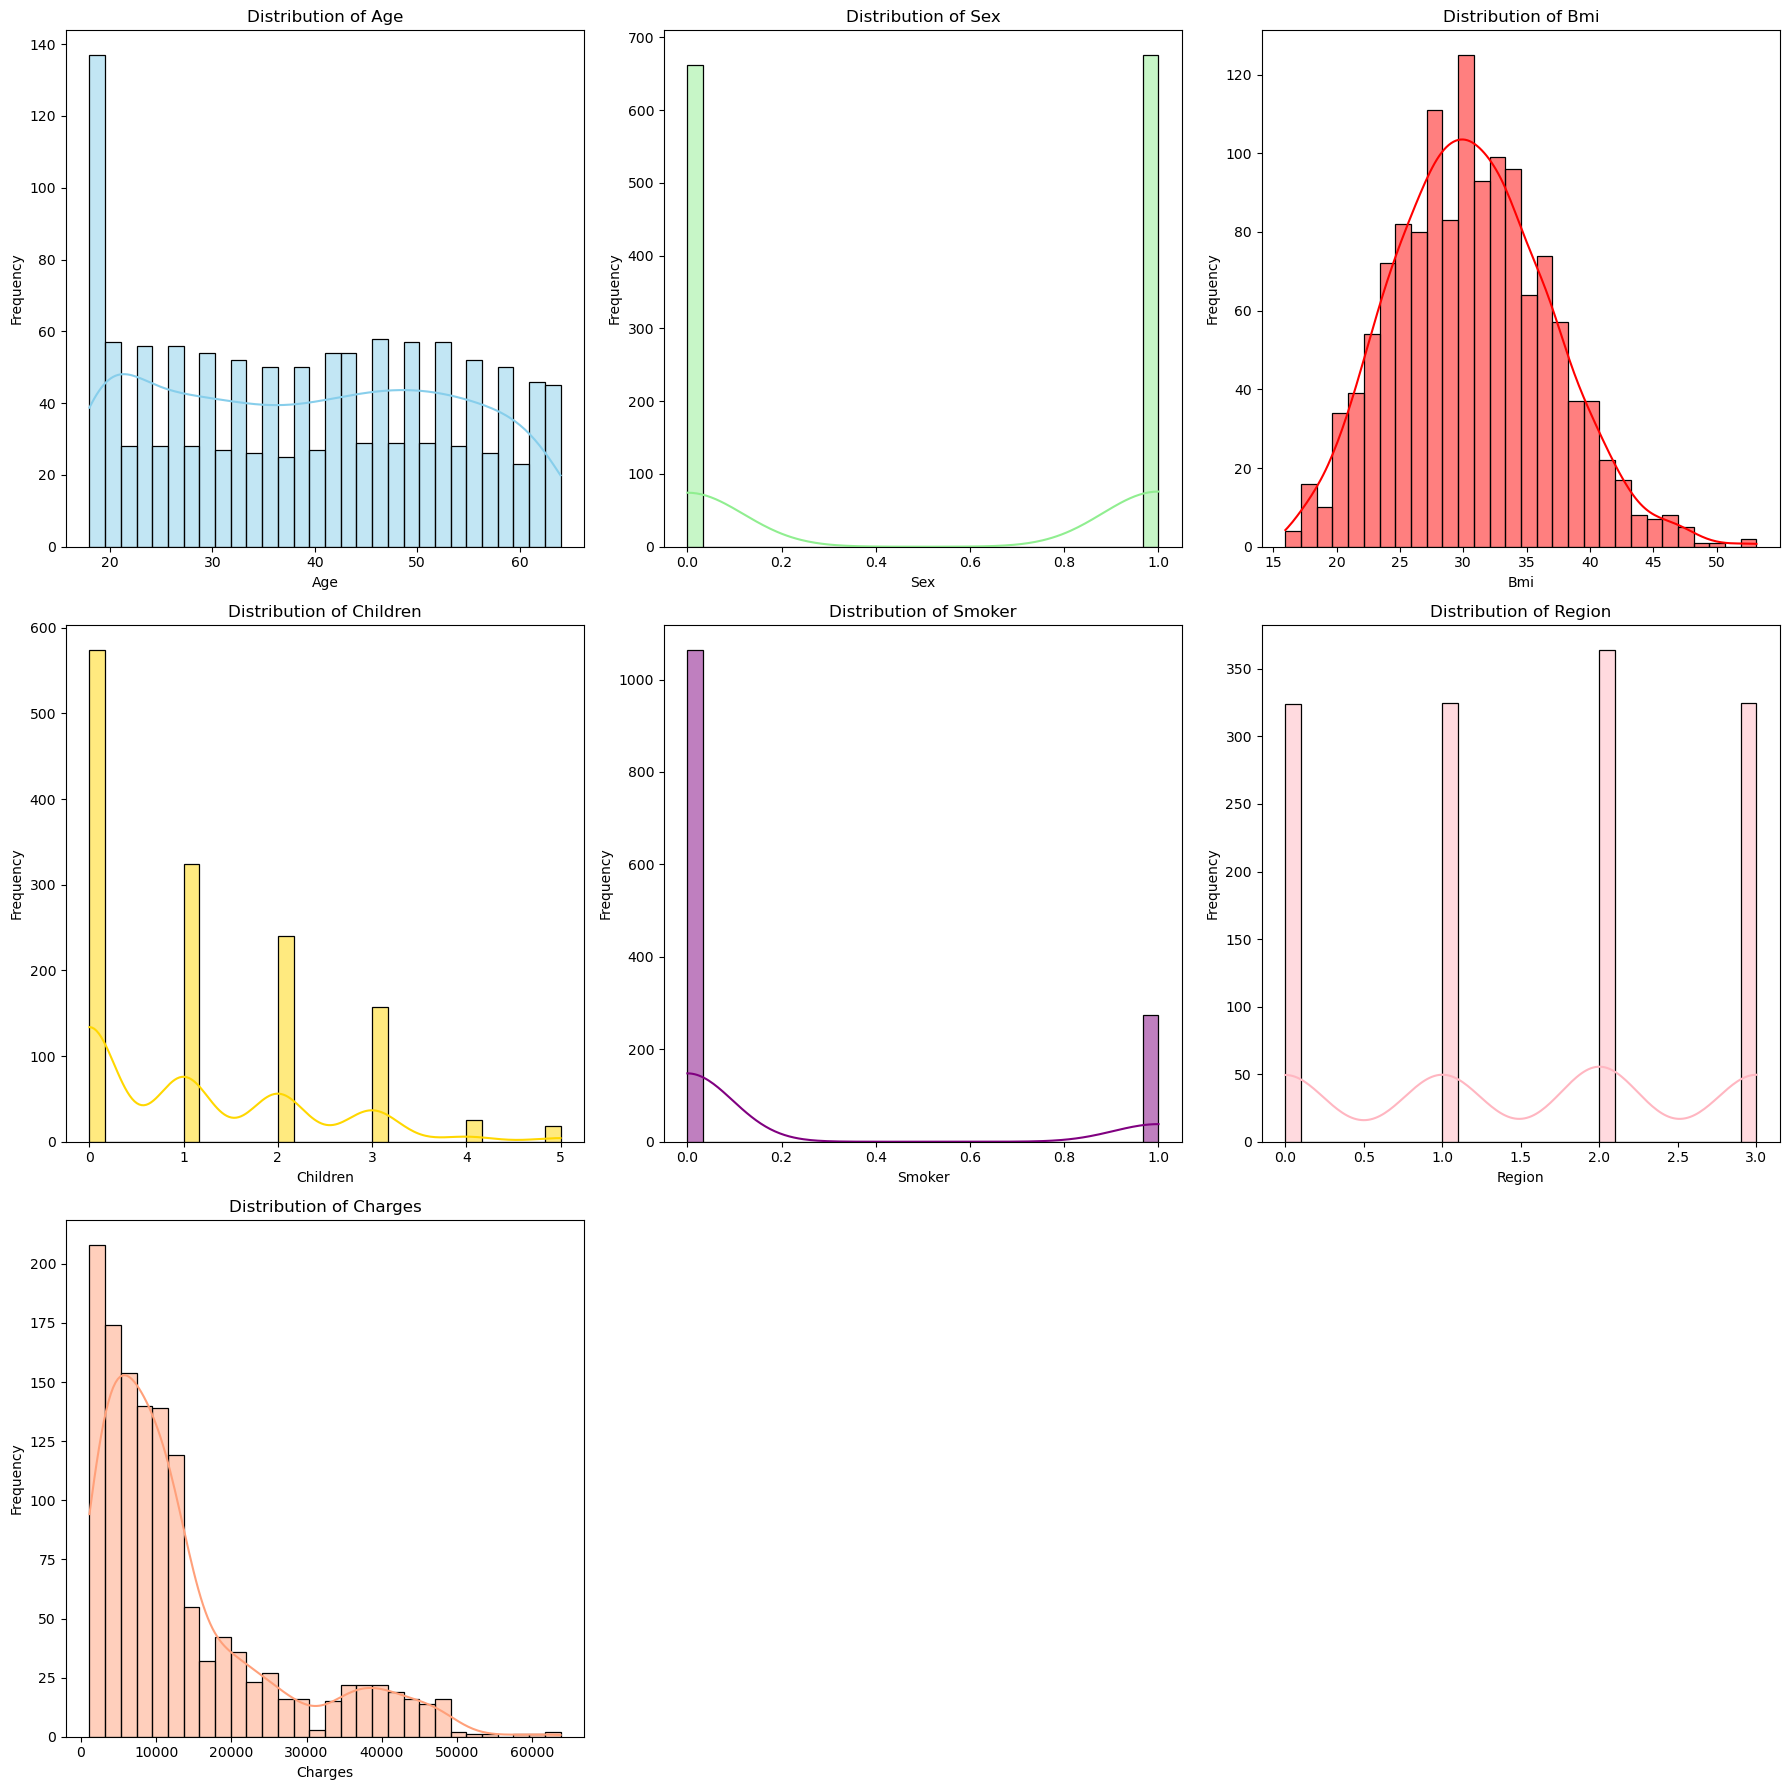

In [19]:
# Define the columns to plot (all columns)
columns = df.columns

# Define colors and size for each plot
colors = ['skyblue', 'lightgreen', 'red', 'gold', 'purple', 'lightpink', 'lightsalmon', 'yellow', 'lightyellow']
plt.figure(figsize=(18, 18))

# Loop through the columns and plot each one
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  
    
    # Use different colors for categorical and numerical data
    if df[col].dtype == 'object':  # Categorical data
        sns.countplot(x=df[col], palette='Set2')
        plt.title(f'Distribution of {col.capitalize()}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
    else:  # Numerical data
        sns.histplot(df[col], kde=True, bins=30, color=colors[i-1])
        plt.title(f'Distribution of {col.capitalize()}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

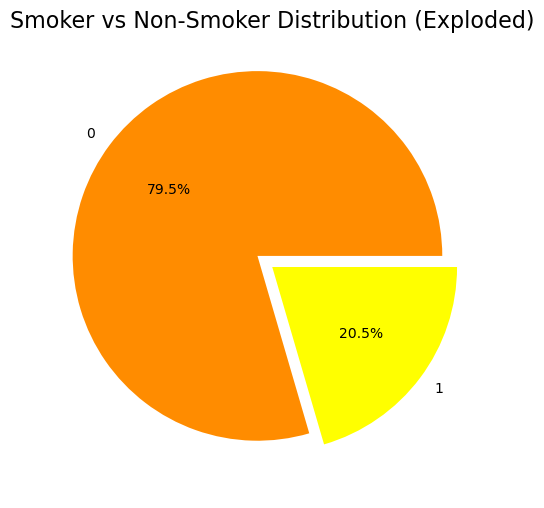

In [20]:
smoker_count = df['smoker'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(smoker_count, labels=smoker_count.index, autopct='%1.1f%%', explode=(0.1, 0), colors=['DarkOrange', 'yellow'])
plt.title('Smoker vs Non-Smoker Distribution (Exploded)', fontsize=16)
plt.show()

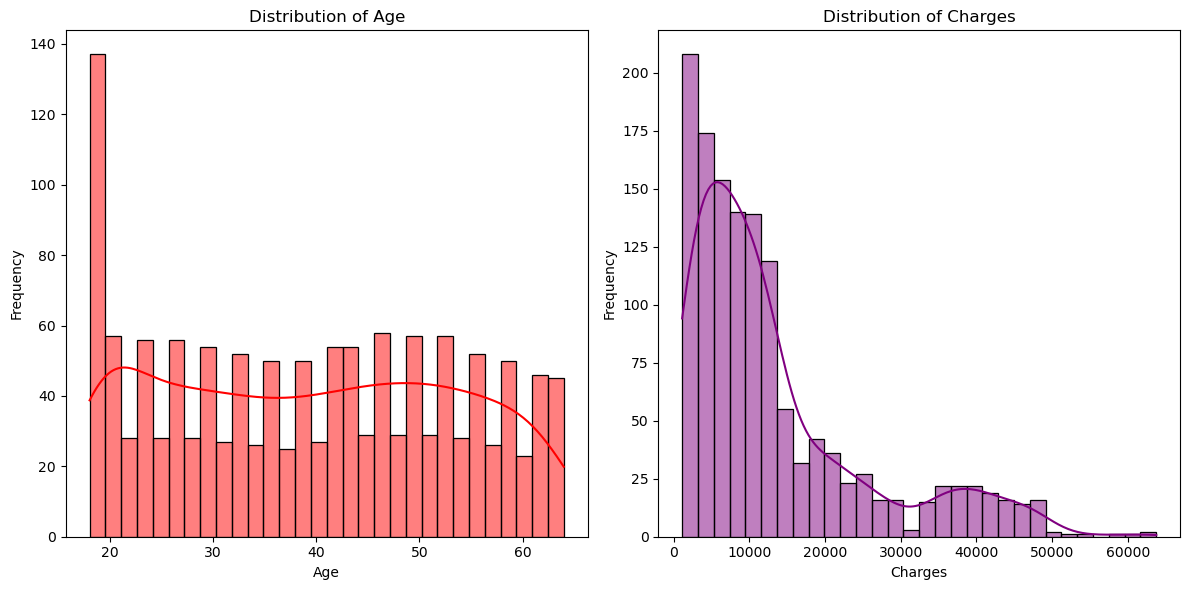

In [21]:
plt.figure(figsize=(12, 6))

# Age distribution 
plt.subplot(1, 2, 1) 
sns.histplot(df['age'], kde=True, color='red', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Charges distribution 
plt.subplot(1, 2, 2)  
sns.histplot(df['charges'], kde=True, color='purple', bins=30)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Splitting Features and Target Variable

In [23]:
x=df.drop(['charges'],axis=1)
y=df['charges']

 # Train/Test split
1. Split data into two part : a training set and a testing set
2. Train the model on training set
3. Test the Model on Testing set

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# Model Training

In [27]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [28]:
y_pred1 = rf.predict(x_test)
y_pred2 = gr.predict(x_test)

# Model Performance Evaluation

In [30]:
r2_rf = r2_score(y_test, y_pred1)
r2_gr = r2_score(y_test, y_pred2)

print("Random Forest R²:", r2_rf)
print("Gradient Boosting R²:", r2_gr)

Random Forest R²: 0.8316503128149191
Gradient Boosting R²: 0.8677639334252014


In [31]:
joblib.dump(rf, r"C:\Users\original\Downloads\insurance_model.pkl")


['C:\\Users\\original\\Downloads\\insurance_model.pkl']

# User Interaction for Predictions

In [33]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import numpy as np
import gradio as gr
import joblib

rf = joblib.load(r"C:\Users\original\Downloads\insurance_model.pkl")

le_dict = joblib.load(r"C:\Users\original\Downloads\label_encoders.pkl")

def predict_health_insurance_cost(age, sex, bmi, children, smoker, region):
    try:
        input_data = pd.DataFrame({
            'age': [age],
            'sex': [sex],
            'bmi': [bmi],
            'children': [children],
            'smoker': [smoker],
            'region': [region]
        })
        
        input_data['sex'] = le_dict['sex'].transform([input_data['sex'][0]])
        input_data['smoker'] = le_dict['smoker'].transform([input_data['smoker'][0]])
        input_data['region'] = le_dict['region'].transform([input_data['region'][0]])
        
        predict = rf.predict(input_data)
        return f'Predicted Health Insurance Cost: ${predict[0]:,.2f}'
    
    except Exception as e:
        return f'Error: {str(e)}'

gr.Interface(
    fn=predict_health_insurance_cost,
    inputs=[
        gr.Number(label='Age'),
        gr.Dropdown(['male', 'female'], label='Sex'),
        gr.Number(label='BMI'),
        gr.Number(label='Children'),
        gr.Dropdown(['no', 'yes'], label='Smoker'),
        gr.Dropdown(['northwest', 'northeast', 'southeast', 'southwest'], label='Region')
    ],
    outputs=gr.Textbox(label='Predicted Health Insurance Cost'),
    title='Health Insurance Cost Prediction',
).launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
